Ricardo Kaleb Flores Alfonso, A01198716

Primero se importan las librerias

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway 
from sklearn.linear_model import LinearRegression 
import scipy.stats as stats

Se crea el dataframe con la información

In [14]:
df = pd.DataFrame({"weigh": (800,952,1052,350,750,600,1075,250,700,650,975,350,950,425,725),"volume":(885,1016,1125,239,701,641,1228,412,953,929,1492,419,1010,595,1034),"cover":("hc","hc","hc","hc","hc","hc","hc","hc","pb","pb","pb","pb","pb","pb","pb")})

In [15]:
df

,weigh,volume,cover
0,800,885,hc
1,952,1016,hc
2,1052,1125,hc
3,350,239,hc
4,750,701,hc
5,600,641,hc
6,1075,1228,hc
7,250,412,hc
8,700,953,pb
9,650,929,pb


In [16]:
df.cover = df.cover == "hc" 

Primero se hace un modelo lineal con la variable de volumen y peso. De este se obtienen los coeficientes de la regresión y las pruebas de hipótesis para demostrar significancia de cada variable.

In [17]:
X = sm.add_constant(df["volume"])
linear_model = sm.OLS(df["weigh"], X).fit()
linear_model.summary()

c:\Users\progra.DESKTOP-GV4Q93K\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  weigh   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     52.67
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           6.39e-06
Time:                        10:17:12   Log-Likelihood:                -92.548
No. Observations:                  15   AIC:                             189.1
Df Residuals:                      13   BIC:                             190.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.4751     88.615      1.213      0.247     -83.967     298.917
volume         0.7092      0.098      7.257      0.000       0.498       0.920
==============================================================================
Omnibus:                        6.154   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                1.560
Skew:                          -0.151   Prob(JB):                        0.458
Kurtosis:                       1.450   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Al tener un valor de p Prob(F-statistic) menor a 0.05 se rechaza la hipótesis nula de que el modelo no es significativo. Asi que de esta manera podemos usar el modelo para predecir el peso de un libro conociendo su volumen.

Para la significancia de las variables tenemos que la hipótesis nula es que el coeficiente es igual a 0 y la hipótesis alternativa es que el coeficiente es diferente de 0. Si el p-value es menor a 0.05 se rechaza la hipótesis nula y se concluye que la variable es significativa.

Para el coeficiente 0, que es la constante se tiene un p-value de 0.247, por lo que no es significativa y se convierte en 0.

Para el coeficiente 1, que es el coeficiente de la variable de volumen, se tiene un p-value de 0.000, por lo que es significativa.

Haciendo asi que el modelo sea: peso = 0.7092 * volumen

Ahora será necesario comprobar el supuesto de los errores

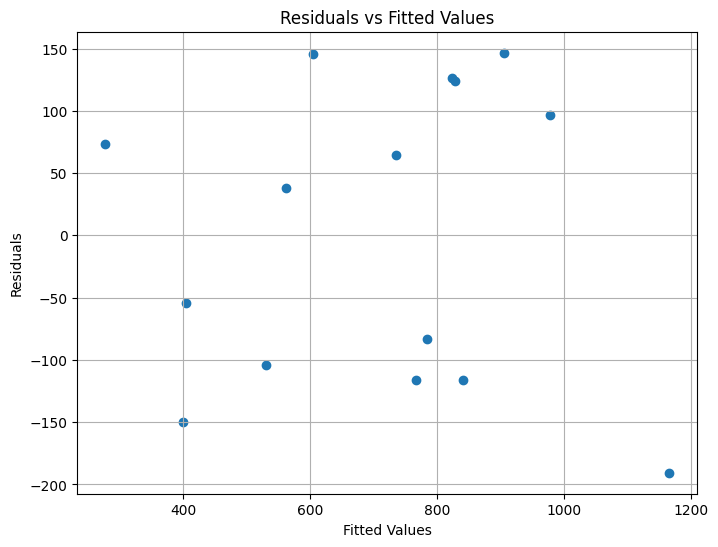

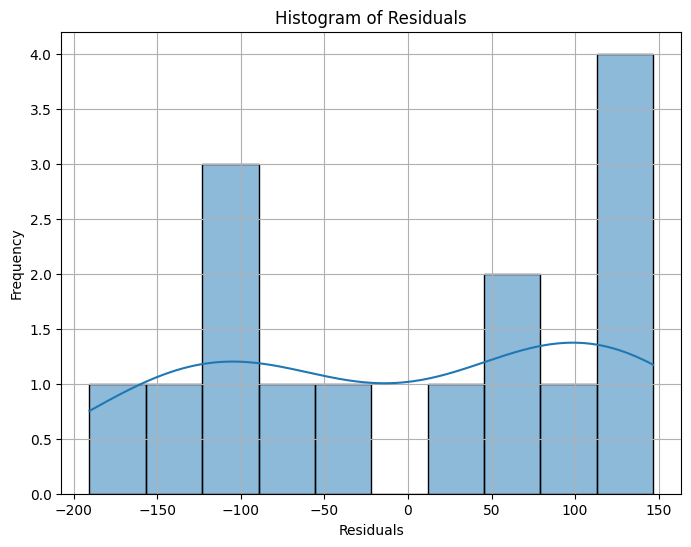

<Figure size 800x600 with 0 Axes>

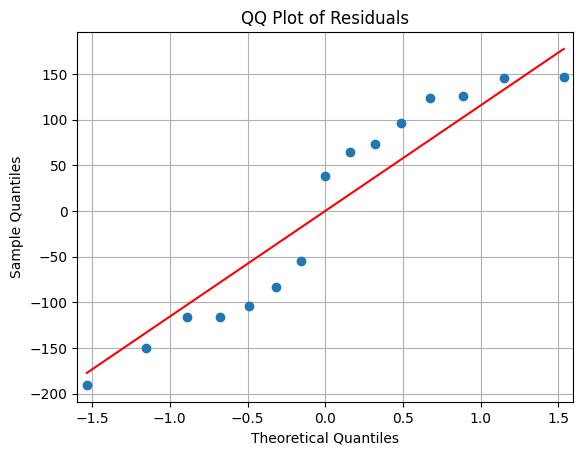

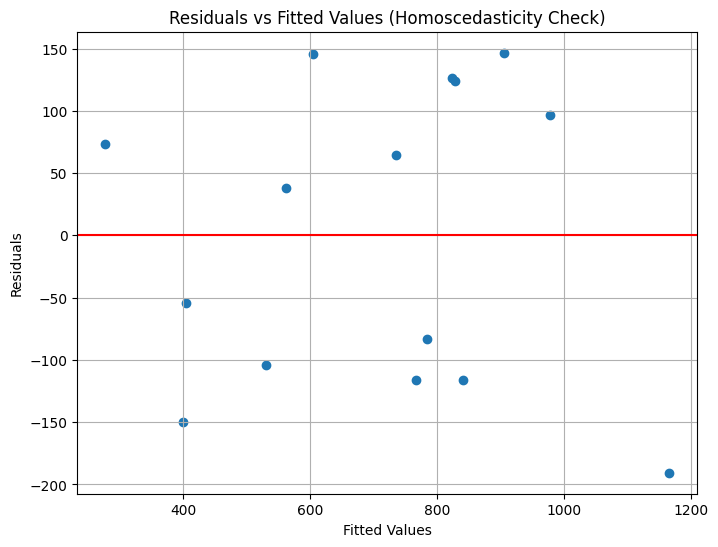

In [18]:
# Get residuals
residuals = linear_model.resid

# Plot residuals vs fitted values to check for independence
plt.figure(figsize=(8, 6))
plt.scatter(linear_model.fittedvalues, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot QQ plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()

# Check homoscedasticity using predicted values and residuals
plt.figure(figsize=(8, 6))
plt.scatter(linear_model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [19]:
# Calculate residuals
residuals = linear_model.resid



# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

# Print p-value
print("Shapiro-Wilk test p-value:", shapiro_test[1])

Shapiro-Wilk test p-value: 0.06968885660171509


Primero se hace un histograma de los errores para ver si se distribuyen normalmente. Se puede ver que los errores no se distribuyen normalmente.
De igual manera el shapiro test nos da un p-value de 0.069, por lo que se acepta la hipótesis nula de que los errores se distribuyen normalmente, asi se cumple el supuesto de normalidad.

Para la prueba de independencia de errores se tiene un valor de Durbin-Watson de 1.025, por lo que se encuentra un poco de correlación entre los errores. Por lo que no se cumple el supuesto de independencia.

Para la prueba de homoscedasticity se hace una gráfica de los errores contra el volumen. Se puede ver que los errores no tienen una relación con el volumen, por lo que se cumple el supuesto de homoscedasticity.


Multivariate linear regression

In [20]:
X = sm.add_constant(df[["volume", "cover"]])
y = df["weigh"]

In [21]:
X["cover"]=X["cover"].astype(int)

In [22]:
multi_model = sm.OLS(y, X).fit()
multi_model.summary()

c:\Users\progra.DESKTOP-GV4Q93K\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  weigh   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     44.95
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.67e-06
Time:                        10:17:13   Log-Likelihood:                -88.652
No. Observations:                  15   AIC:                             183.3
Df Residuals:                      12   BIC:                             185.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.6918     82.801     -0.165      0.871    -194.100     166.716
volume         0.7573      0.080      9.439      0.000       0.582       0.932
cover        150.9736     52.804      2.859      0.014      35.924     266.023
==============================================================================
Omnibus:                        2.217   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                0.490
Skew:                          -0.189   Prob(JB):                        0.783
Kurtosis:                       3.801   Cond. No.                     3.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

En este caso se hace un modelo lineal con dos variables, volumen y tipo de cobertura. De este se obtiene un Prob(F-statistic) menor a 0.05, por lo que se rechaza la hipótesis nula de que el modelo no es significativo. Asi que de esta manera podemos usar el modelo para predecir el peso de un libro conociendo su volumen y tipo de cobertura.

Por otro lado para cada uno de los coeficientes se tiene que la constante tiene un p-value de 0.871, por lo que no es significativa y se convierte en 0. El coeficiente de la variable de volumen tiene un p-value de 0.000, por lo que es significativa. El coeficiente de la variable de tipo de cobertura tiene un p-value de 0.014, por lo que es significativa.

De esta manera se tendría que la función es la siguiente: peso = 0.7092 * volumen + 150.97 * tipo de cobertura

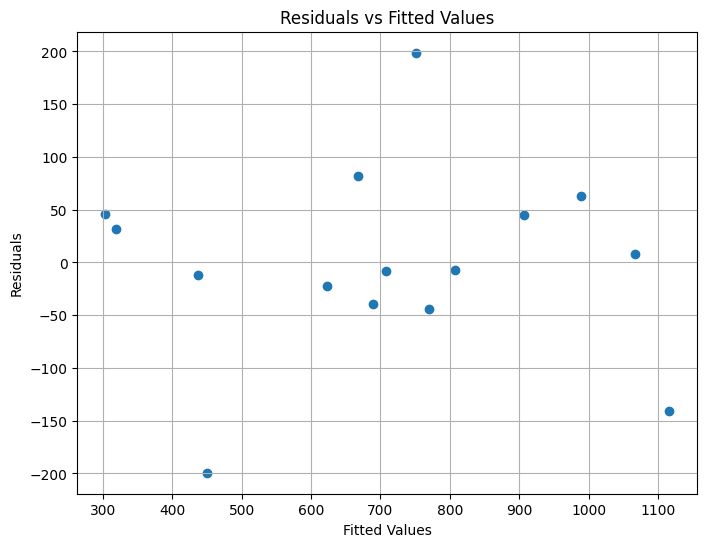

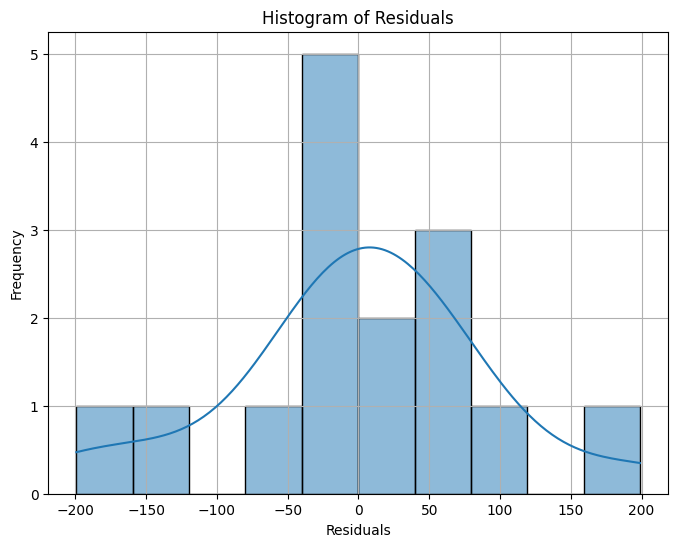

<Figure size 800x600 with 0 Axes>

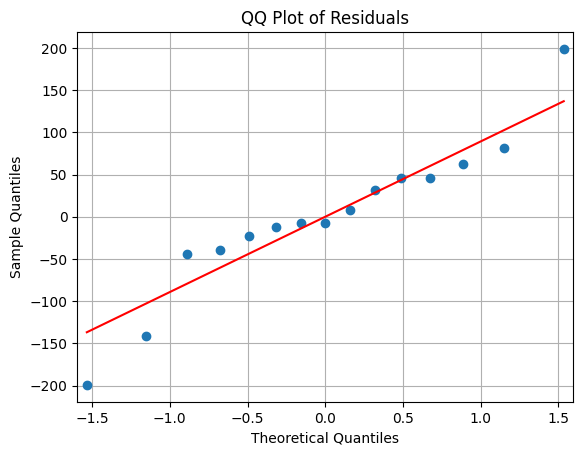

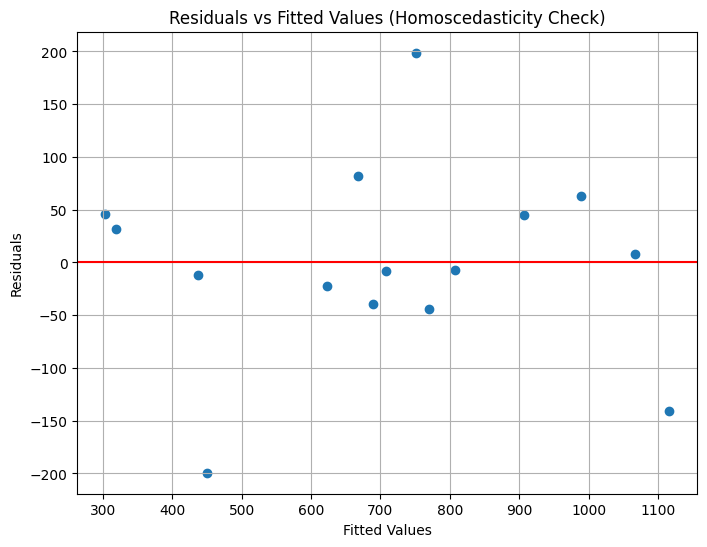

In [23]:
# Get residuals
residuals = multi_model.resid

# Plot residuals vs fitted values to check for independence
plt.figure(figsize=(8, 6))
plt.scatter(multi_model.fittedvalues, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot QQ plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()

# Check homoscedasticity using predicted values and residuals
plt.figure(figsize=(8, 6))
plt.scatter(multi_model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [24]:
# Calculate residuals
residuals = multi_model.resid



# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

# Print p-value
print("Shapiro-Wilk test p-value:", shapiro_test[1])

Shapiro-Wilk test p-value: 0.4106968343257904


Primero se hace un histograma de los errores para ver si se distribuyen normalmente. Se puede ver que los errores no se distribuyen normalmente. La prueba de Shapiro nos da un p-value de 0.41, por lo que los valores estan distribuidos normalmente

Para la prueba de independencia de errores se tiene un valor de Durbin-Watson de 1.784, por lo que se encuentra un poco de correlación entre los errores. Sin embargo esta más cercano al dos y esto indica que no hay correlación entre los errores. Por lo que se cumple el supuesto de independencia.

Para la prueba de homoscedasticity se hace una gráfica para demostrar que la varianza es la misma para todos los valores de las variables independientes. Se puede ver que los errores no tienen una relación con el volumen, por lo que se cumple el supuesto de homoscedasticity.

# Diferencias entre la eliminación hacia adelante y hacia atras

La eliminación hacia delante consiste en que se empieza con un modelo vacio y se van añadiendo variables mientras más correlación se encuentre en cada paso del modelo. Este proceso se repite hasta que ya no se encuentre una variable que se pueda añadir. 

Por otro lado la eliminación hacia atras empieza con un modelo con todas las variables y se eliminan las que tengan menor correlación con la variable dependiente. Este proceso se repite hasta que ya no se encuentre una variable que se pueda eliminar.

La eliminación hacia adelantes es más rapida, pero es posible que se dejen valores importantes fuera. Por otro lado la eliminación hacia atras es más lenta, pero se asegura que no se dejen valores importantes fuera.

En este caso se usó un modelo completo, sin eliminar ninguna de las variables.

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True